In [3]:
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

### Coin Flip

In [4]:
def step():
    return np.random.choice([-1,1], 1)[0]

In [5]:
step()

1

### Go for a random 1000 step walk

In [6]:
N1000 = 0

for n in range(1000):
    N1000 = N1000 + step()
    
N1000

-32

### Animate the random 1000 step walk

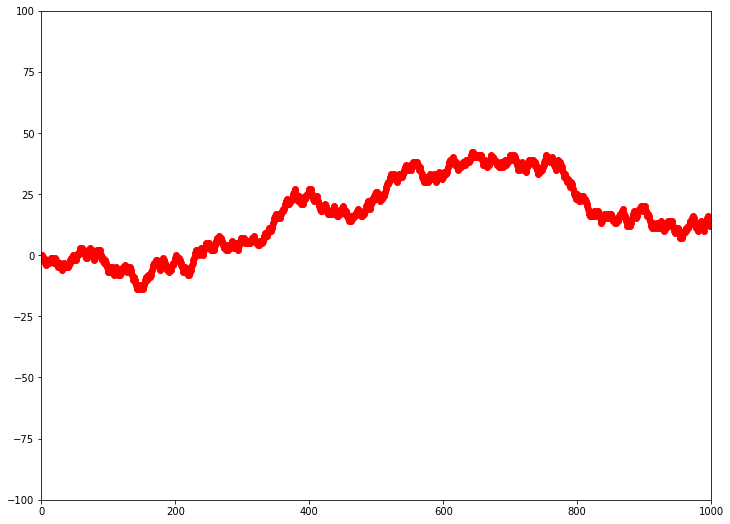

<Figure size 864x648 with 0 Axes>

In [11]:
# make sure things like NumPy and matplotlib are imported before trying this
fig = plt.figure(figsize=(12,9))

N1000 = 0
N1000_hold = []
y_hold = []


for i in range(0,1000):
    N1000 = N1000 + step()
    N1000_hold.append(N1000)
    y_hold.append(i)
    plt.plot(y_hold, N1000_hold, 'ro')
    plt.xlim(0,1000)
    plt.ylim(-100,100)
    time.sleep(0.0001)  
    clear_output(wait = True)
    display(fig)           
    fig.clear()             

### Go for three random walks (and graph them)

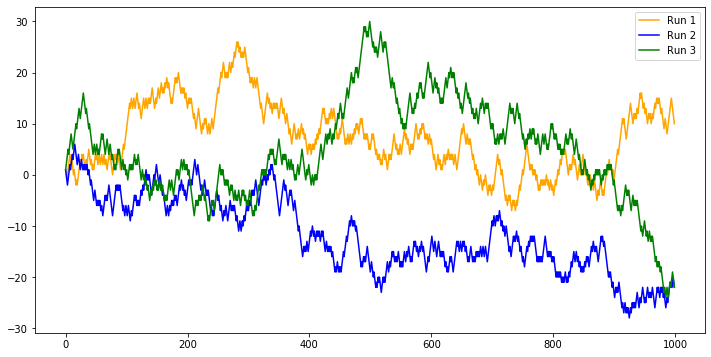

In [48]:
n1kp1_hold = []
n1kp2_hold = []
n1kp3_hold = []

n1kv1= 0
n1kv2= 0
n1kv3= 0

y_hold = range(0,1000)

for n in y_hold:
    n1kv1 = n1kv1 +step()
    n1kv2 = n1kv2 +step()
    n1kv3 = n1kv3 +step()
    
    n1kp1_hold.append(n1kv1)
    n1kp2_hold.append(n1kv2)
    n1kp3_hold.append(n1kv3)
    
plt.figure(figsize=(12,6))
plt.plot(y_hold, n1kp1_hold, color = 'orange', label = "Run 1")
plt.plot(y_hold, n1kp2_hold, color = 'blue', label = "Run 2")
plt.plot(y_hold, n1kp3_hold, color = 'green', label = "Run 3")
plt.legend()


### For 1000 walks, calculate the distance of all distances squared

In [12]:
trajs = np.zeros(1000)
y_hold = range(0,1000)

for n in y_hold:
    for index in range(0,1000):
        trajs[index] = trajs[index] + step()
    
dist_sqrs = trajs @ trajs
dist_sqrs

1032216.0

### Plot distribution of walk lengths

(array([ 12.,  44., 126., 165., 213., 227., 130.,  57.,  20.,   6.]),
 array([-86. , -67.2, -48.4, -29.6, -10.8,   8. ,  26.8,  45.6,  64.4,
         83.2, 102. ]),
 <a list of 10 Patch objects>)

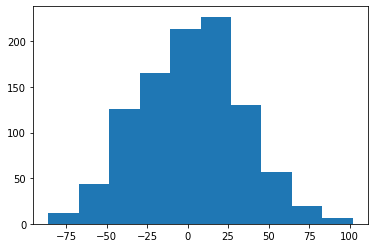

In [13]:
plt.hist(trajs)

### Save 10 total square distances at equal points throughout the 1000 walks

In [81]:
trajs = np.zeros(1000)
y_hold = range(0,1000)
ave_dist_sqr = []

for n in y_hold:
    for index in range(0,1000):
        trajs[index] = trajs[index] + step()
    if not n % 100:
        ave_dist_sqr.append(trajs @ trajs)

In [83]:
len(ave_dist_sqr)
ave_dist_sqr

[1000.0,
 109000.0,
 207936.0,
 312448.0,
 418128.0,
 516944.0,
 609464.0,
 741888.0,
 821112.0,
 916872.0]

### Show that the Einstein Diffusion Equation is linear

Text(0, 0.5, 'Average Distance')

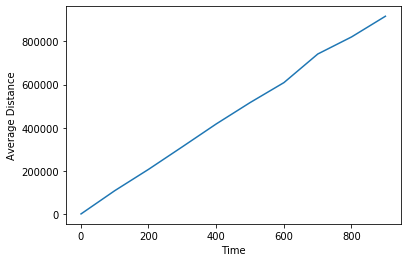

In [87]:
plt.plot(range(1,1001,100), ave_dist_sqr)
plt.xlabel('Time')
plt.ylabel('Average Distance')

### Now, we want to walk in two dimensions

In [96]:
def two_step():
    if step() == 1:
        return np.array([0,step()])
    else:
        return np.array([step(),0])

In [103]:
two_step()

array([-1,  0])

### Run and graph a random 2D walk

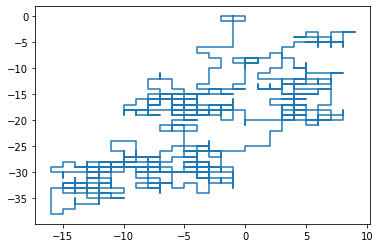

In [115]:
x = 0
y = 0
x_hold = []
y_hold = []
t_hold = range(1000)

for n in range(1000):
    x_add, y_add = two_step()
    x = x + x_add
    y = y + y_add
    x_hold.append(x)
    y_hold.append(y)

plt.plot(x_hold,y_hold)

### Plot x and y coords of 2D walk

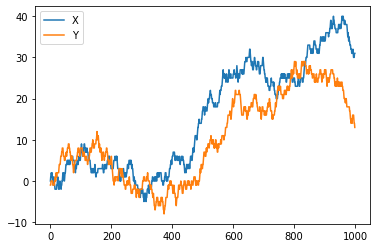

In [108]:
plt.plot(t_hold, x_hold, label = 'X')
plt.plot(t_hold, y_hold, label = 'Y')
plt.legend()